# Actividad integradora - Visualización y Preprocesamiento de Dato
## Grupo 2
**Integrantes:**
- Francisco Lucich
- Esteban Luna
- Francisco Moretti
- Tomás Zubik

## Parte 1: Análisis de un dataset tabular

### Dataset, calidad de vinos

In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\franm\.cache\kagglehub\datasets\yasserh\wine-quality-dataset\versions\1


In [14]:
import pandas as pd
import os

# Construir la ruta al archivo CSV
csv_file = os.path.join(path, "WineQT.csv")

# Cargar el dataset en un DataFrame
df = pd.read_csv(csv_file)

# Mostrar las primeras filas del DataFrame
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Objetivo:
- ¿Como inciden los componentes del vino en su calidad?

In [15]:
df.pop('Id')

0          0
1          1
2          2
3          3
4          4
        ... 
1138    1592
1139    1593
1140    1594
1141    1595
1142    1597
Name: Id, Length: 1143, dtype: int64

In [16]:
# Verificar la cantidad de filas y columnas en el DataFrame
df.shape


(1143, 12)

In [17]:
# Verificar los tipos de datos en el DataFrame
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [18]:
# Verificar si hay valores nulos en el DataFrame
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
df = df.astype(float)
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

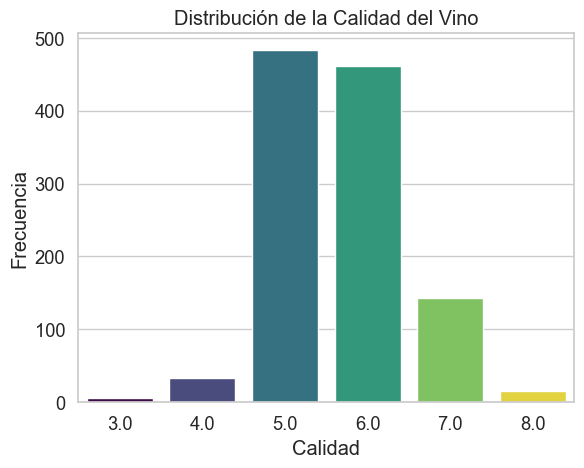

In [20]:
import seaborn as sns

import matplotlib.pyplot as plt


sns.countplot(data=df, x='quality', hue='quality', palette='viridis', dodge=False, legend=False)
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()



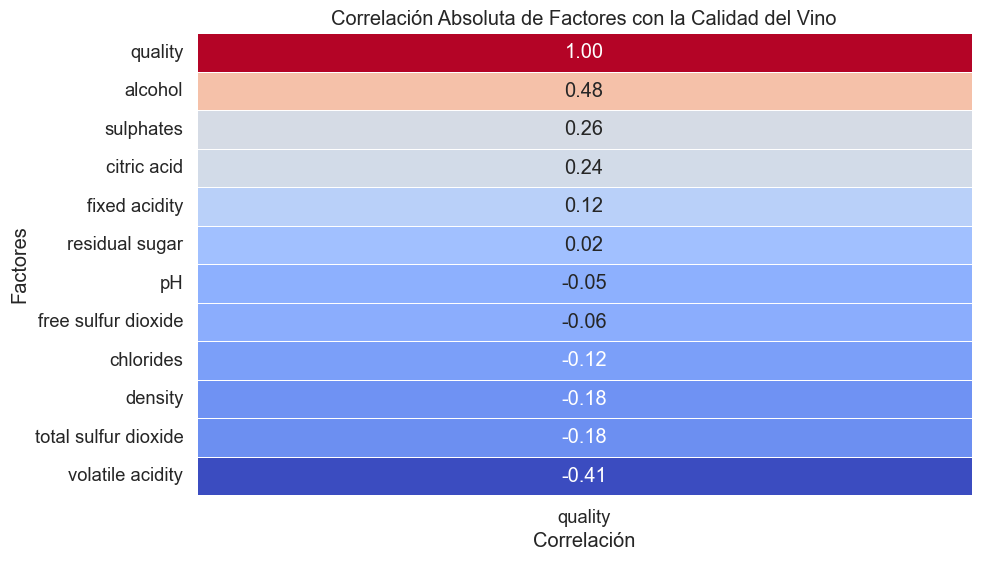

In [24]:
# Calcular las correlaciones con la columna 'quality'
quality_correlation = df.corr()[['quality']]
quality_correlation = quality_correlation.sort_values(by='quality', ascending=False)

# Crear un mapa de calor para visualizar las correlaciones con la calidad
plt.figure(figsize=(10, 6))
sns.heatmap(quality_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=False)
plt.title('Correlación Absoluta de Factores con la Calidad del Vino')
plt.xlabel('Correlación')
plt.ylabel('Factores')
plt.show()

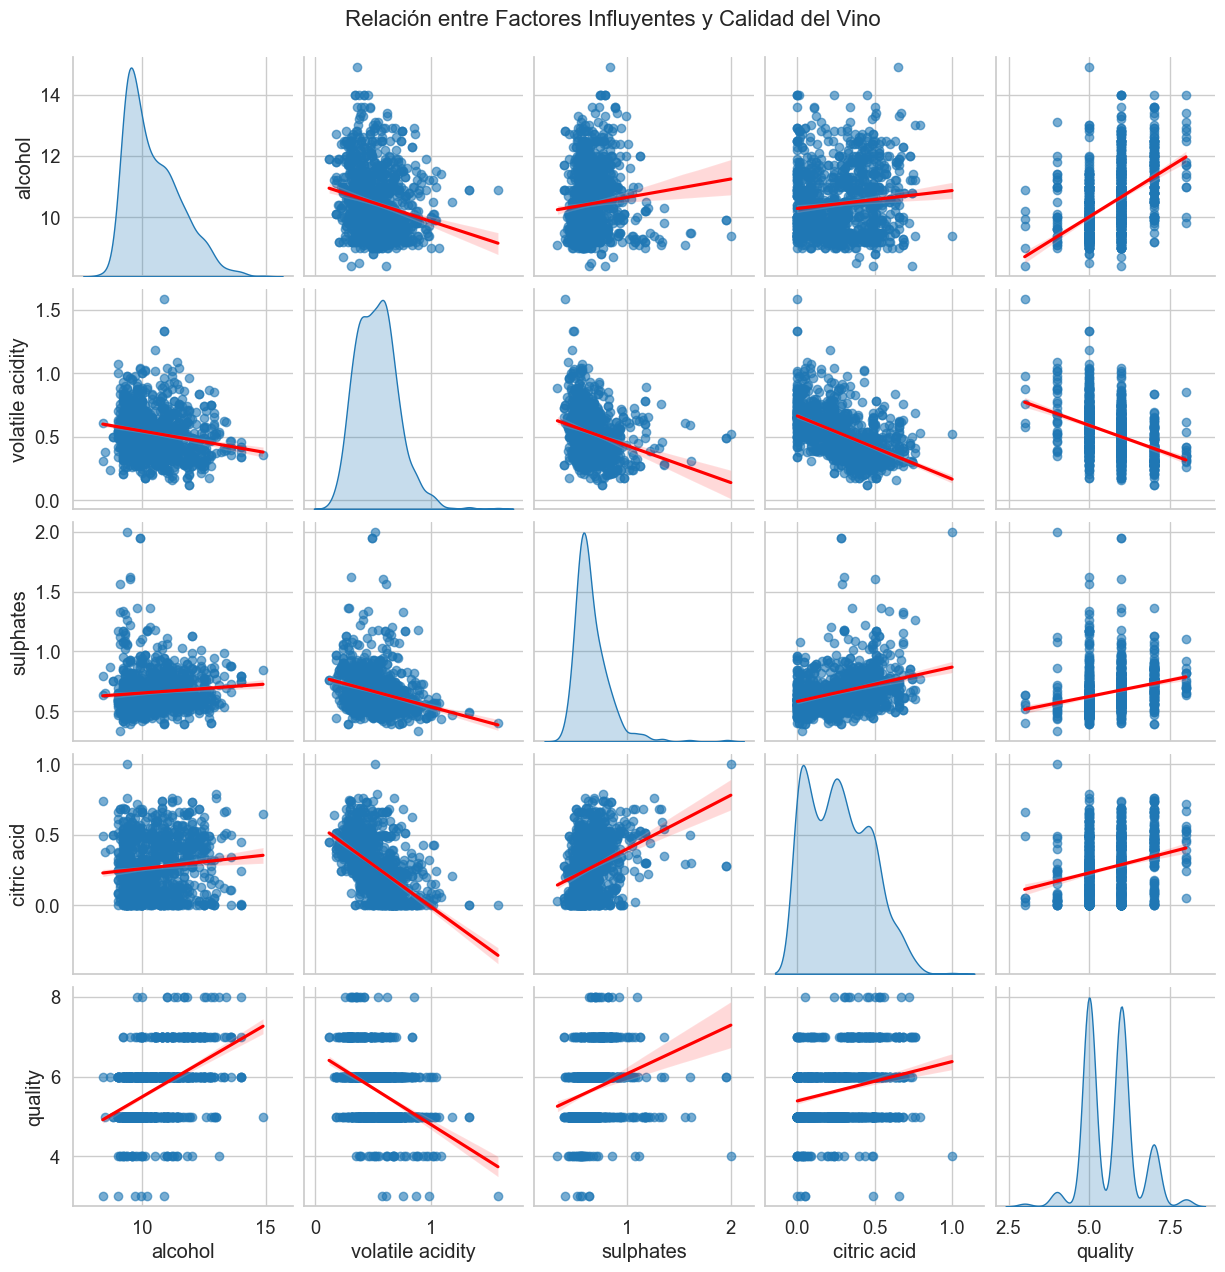

In [22]:
# Ajustar el tamaño de la figura
sns.set_context("notebook", font_scale=1.2)  # Escalar el tamaño de las fuentes
sns.set_style("whitegrid")  # Estilo más limpio para los gráficos

# Crear el pairplot con ajustes
pairplot = sns.pairplot(
    df, 
    vars=['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality'], 
    kind='reg', 
    diag_kind='kde', 
    plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.6}}
)

# Ajustar el título del gráfico
pairplot.fig.suptitle('Relación entre Factores Influyentes y Calidad del Vino', y=1.02, fontsize=16)

# Mostrar el gráfico
plt.show()

### Conclusiones:

- **Relación entre factores y calidad del vino:**
    - Según el análisis de correlación, el factor que más influye en la calidad del vino es el contenido de alcohol, con una correlación positiva de aproximadamente 0.48. Esto sugiere que un mayor contenido de alcohol tiende a estar asociado con una mejor calidad del vino.
    - La acidez volátil tiene una correlación negativa significativa (-0.41), lo que indica que niveles más altos de acidez volátil pueden estar asociados con una menor calidad del vino.
    - Otros factores como los sulfatos y el ácido cítrico también muestran correlaciones positivas moderadas con la calidad, aunque su impacto es menor en comparación con el alcohol.

- **Factores con menor influencia:**
    - Variables como el azúcar residual, el pH y el dióxido de azufre libre tienen correlaciones muy bajas con la calidad del vino, lo que sugiere que su impacto en la calidad es limitado.

- **Distribución de la calidad:**
    - La distribución de la calidad del vino muestra que la mayoría de los vinos tienen una calidad promedio (valores de 5 y 6), con menos ejemplos de vinos de calidad muy alta o muy baja.

- **Relaciones visuales:**
    - Los gráficos de dispersión y los pairplots muestran tendencias claras entre algunos factores clave (como el alcohol y la acidez volátil) y la calidad del vino, lo que respalda las conclusiones obtenidas a partir de la correlación.

En resumen, el contenido de alcohol y la acidez volátil son los factores más influyentes en la calidad del vino, mientras que otros factores tienen un impacto menor. Esto proporciona una base para priorizar estos componentes en la producción y evaluación de vinos de alta calidad.